# Physics Features
In this notebook, we explore the use of domain based knowledge to derive additional new features. We present the formulas that we have derived from existing features and correspondingly generate and identify the new distribution of data created.

In [3]:
import math
import numpy as np
import pandas as pd
from astropy.io import ascii
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
raw_data = ascii.read('../data/raw/plti/kplr_dr25_inj1_plti.txt')
df = raw_data.to_pandas()

df.head()

/Users/yutarochan/Library/Python/3.6/lib/python/site-packages/IPython/core/interactiveshell.py:2963: TableReplaceWarning: converted column 'Fit_Provenance' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,KIC_ID,Sky_Group,i_period,i_epoch,N_Transit,i_depth,i_dur,i_b,i_ror,i_dor,...,TCE_ID,Measured_MES,r_period,r_epoch,r_depth,r_dur,r_b,r_ror,r_dor,Fit_Provenance
0,11445144,8,70.0385,107.4886,0.9808,1662.0,4.02030,0.4141,0.0306,126.498,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11496840,8,87.8829,103.9753,0.9808,1561.0,2.20705,0.7649,0.0350,214.397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11497236,8,88.3020,84.4552,0.9808,1332.0,2.11234,0.8100,0.0334,207.336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11548779,8,35.4942,73.9562,2.9425,686.0,1.00655,0.8915,0.0247,138.661,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11600744,8,48.8212,97.2396,23.2943,372.0,1.77915,0.8738,0.0183,110.768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Mean Density
$\rho = \dfrac{3T^2}{16G\pi^3R^3}$
* $T$: Period
* $G$: Universal Gravitational Constant
* $R$: Ratio between `i_ror` and `i_dor`

Due to the large distribution of the data, we may have to transform this quantity into the log-space.

In [31]:
G = 6.67408e-11
df['rho'] = (3 * df['i_period']**2) / (16 * G * math.pi**3 * (df['i_dor']/df['i_ror'])**3)

In [32]:
df['rho'].describe()

count    1.462940e+05
mean     1.050328e+07
std      3.918169e+09
min      0.000000e+00
25%      3.565519e+00
50%      8.605198e+00
75%      2.760636e+01
max      1.498621e+12
Name: rho, dtype: float64

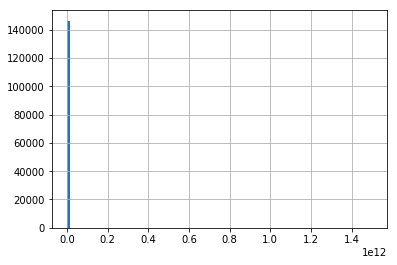

In [33]:
df['rho'].hist(bins=100)
plt.show()